# Next two cells are hidden, due to personal data

In [1]:
# The code was removed by Watson Studio for sharing.

# Importing crime data for London

https://www.kaggle.com/jboysen/london-crime#london_crime_by_lsoa.csv

In [2]:
# The code was removed by Watson Studio for sharing.

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
df=df_data_0.dropna(subset=["borough"])

In [4]:
df_sort=df.groupby("borough")[["value"]].count()

In [5]:
# find the most safe boroughs
df_sort = df_sort.sort_values(["value"], ascending = True)
df_sort.head()

,value
borough,
City of London,9720
Kingston upon Thames,259524
Kensington and Chelsea,296784
Richmond upon Thames,304128
Barking and Dagenham,311040


In [6]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

In [7]:
df_plot=df_sort.head()
df_plot.head()

,value
borough,
City of London,9720
Kingston upon Thames,259524
Kensington and Chelsea,296784
Richmond upon Thames,304128
Barking and Dagenham,311040


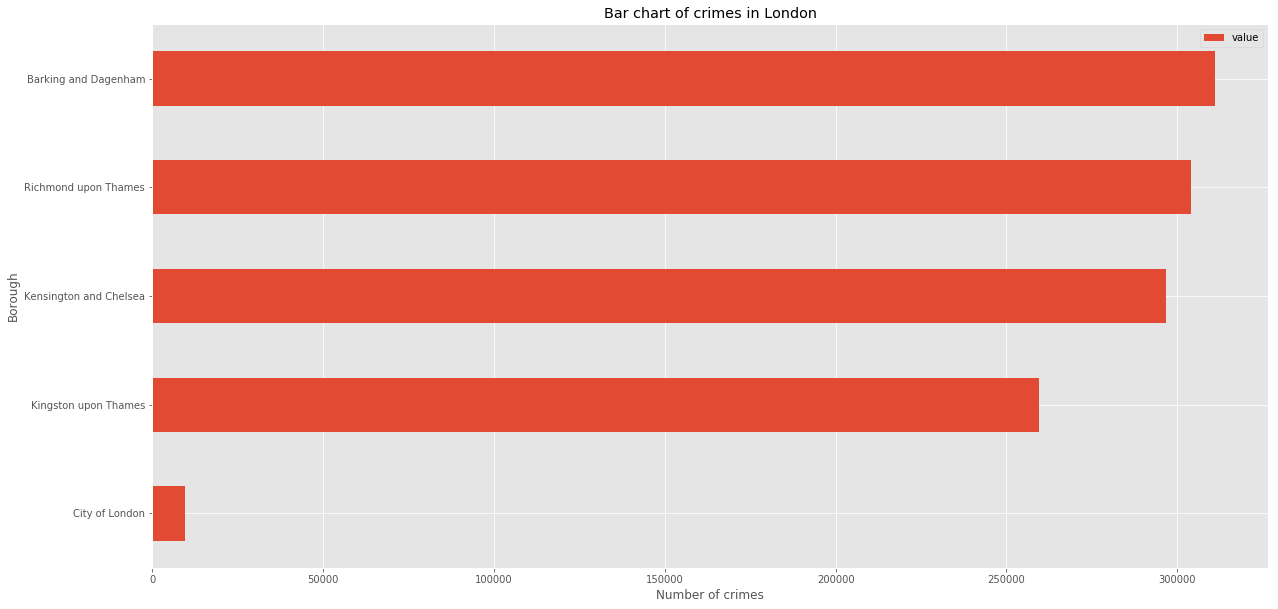

In [8]:
# displays graphically obtained data

df_plot.plot(kind='barh', figsize=(20, 10))

plt.title('Bar chart of crimes in London') # add a title to the histogram
plt.xlabel('Number of crimes') # add x-label
plt.ylabel('Borough') # add y-label

plt.show()

In [9]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

In [10]:
df_plot

,value
borough,
City of London,9720
Kingston upon Thames,259524
Kensington and Chelsea,296784
Richmond upon Thames,304128
Barking and Dagenham,311040


In [11]:
# determine latitude and longitude for selected data

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="ny_explorer")

address = 'City of London'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of City of London are {}, {}.'.format(latitude, longitude))
address = 'Kingston upon Thames'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Kingston upon Thames are {}, {}.'.format(latitude, longitude))
address = 'Kensington and Chelsea'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Kensington and Chelsea are {}, {}.'.format(latitude, longitude))
address = 'Richmond upon Thames'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Richmond upon Thames are {}, {}.'.format(latitude, longitude))
address = 'Barking and Dagenham'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Barking and Dagenham are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of City of London are 51.5156177, -0.0919983.
The geograpical coordinate of Kingston upon Thames are 51.4096275, -0.3062621.
The geograpical coordinate of Kensington and Chelsea are 51.4875417, -0.1682205.
The geograpical coordinate of Richmond upon Thames are 51.44046095, -0.3055192359117199.
The geograpical coordinate of Barking and Dagenham are 51.5541171, 0.15050434261994267.


In [12]:
df_plot["latitude"]=[51.5156177,51.4096275,51.4875417,51.44046095,51.5541171]
df_plot["longitude"]=[-0.0919983,-0.3062621,-0.1682205,-0.3055192359117199,0.15050434261994267]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [17]:
df_plot.reset_index(inplace=True)
df_plot

,index,borough,value,latitude,longitude
0,0,City of London,9720,51.515618,-0.091998
1,1,Kingston upon Thames,259524,51.409627,-0.306262
2,2,Kensington and Chelsea,296784,51.487542,-0.168220
3,3,Richmond upon Thames,304128,51.440461,-0.305519
4,4,Barking and Dagenham,311040,51.554117,0.150504


In [19]:
from IPython.core.display import HTML
# create a plain London map
london_map = folium.Map(location=[51.5156177, -0.0919983], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_plot['latitude'], df_plot['longitude'], df_plot['borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(london_map)  
    
HTML(london_map._repr_html_())
#london_map

# Note that Folium maps are not rendered on Github. In order to see them, please copy the link of this notebook. Visit: http://nbviewer.org/ and paste there copied url.


In [20]:
# The code was removed by Watson Studio for sharing.

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
LIMIT = 100
radius = 2000
london_venues = getNearbyVenues(names=df_plot['borough'],latitudes=df_plot['latitude'],longitudes=df_plot['longitude'])

City of London
Kingston upon Thames
Kensington and Chelsea
Richmond upon Thames
Barking and Dagenham


In [23]:
# show venues in selected borougs
london_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,City of London,51.515618,-0.091998,Goodman Steak House Restaurant,51.514398,-0.090745,Steakhouse
1,City of London,51.515618,-0.091998,The Ned Hotel,51.513755,-0.090067,Hotel
2,City of London,51.515618,-0.091998,The Merchant House,51.513264,-0.093039,Cocktail Bar
3,City of London,51.515618,-0.091998,Hawksmoor Guildhall,51.515498,-0.090849,Steakhouse
4,City of London,51.515618,-0.091998,City Càphê,51.514750,-0.091545,Vietnamese Restaurant


In [24]:
# select all types of restaurants
rest_data = london_venues[london_venues['Venue Category'].str.contains("Restaurant")].reset_index(drop=True)
rest_data.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,City of London,51.515618,-0.091998,City Càphê,51.514750,-0.091545,Vietnamese Restaurant
1,City of London,51.515618,-0.091998,The Trading House,51.515063,-0.091427,Modern European Restaurant
2,City of London,51.515618,-0.091998,Manicomio,51.515369,-0.095414,Italian Restaurant
3,City of London,51.515618,-0.091998,Malibu Kitchen,51.513511,-0.090074,New American Restaurant
4,City of London,51.515618,-0.091998,Burger & Lobster,51.513687,-0.094643,Seafood Restaurant


In [25]:
# determine the number of restaurants per borough
freq=rest_data.groupby("Neighborhood")["Venue Category"].count()
freq=freq.transpose()

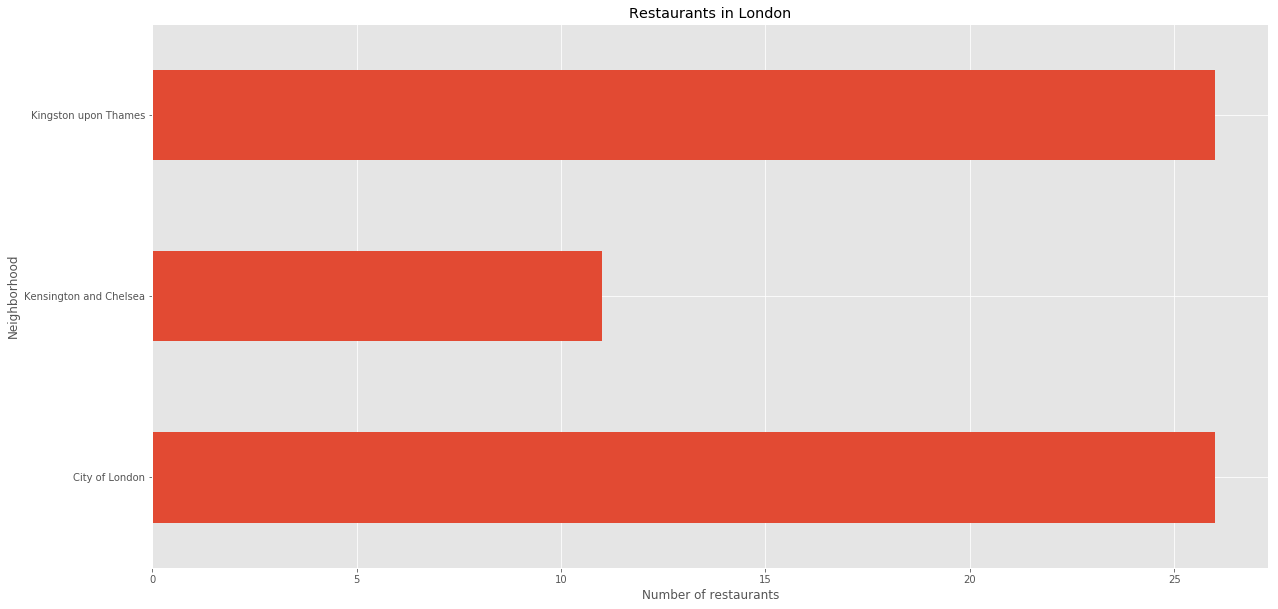

In [26]:
# visualise data
freq.plot(kind='barh', figsize=(20, 10))
#bars=freq["Neighborhood"]
plt.title('Restaurants in London') # add a title to the histogram
plt.xlabel('Number of restaurants') # add x-label
plt.ylabel('Neighborhood') # add y-label
#plt.xticks(freq["Venue Category"], bars)
plt.show()

In [27]:
# let's concentrate only on the safest borough
CL=rest_data[rest_data.Neighborhood=="City of London"]
#KC=rest_data[rest_data.Neighborhood=="Kensington and Chelsea"]
#KT=rest_data[rest_data.Neighborhood=="Kingston upon Thames"]

In [28]:
# determine data
rest_types=CL.groupby("Venue Category")["Venue"].count()
rest_types.columns=["Venue Category","Number"]

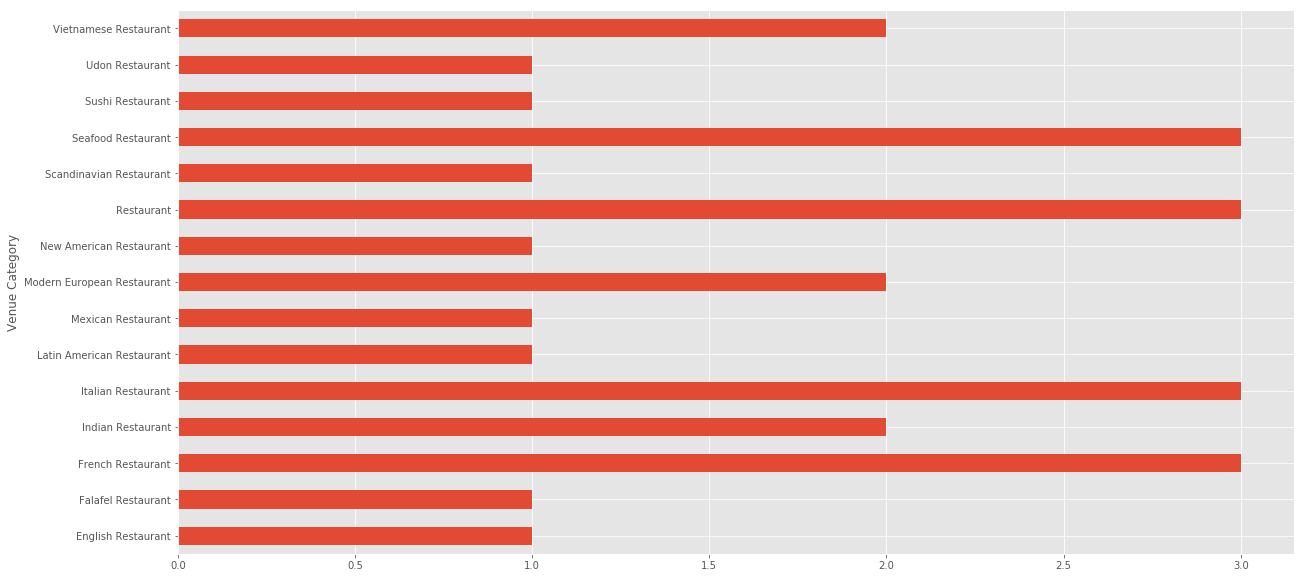

In [29]:
# visualise all types of restaurants in the City of London
rest_types.plot(kind='barh', figsize=(20, 10))
plt.show()

In [30]:
# create a plain restaurants in London map
restaurants_map = folium.Map(location=[51.515618, -0.091998], zoom_start=14)

# add markers to map
for lat, lng, restaurant in zip(CL['Venue Latitude'], CL['Venue Longitude'], CL['Venue Category']):
    label = '{}'.format(restaurant)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(restaurants_map)  
    
HTML(restaurants_map._repr_html_())
#restaurants_map

# # Note that Folium maps are not rendered on Github. In order to see them, please copy the link of this notebook. Visit: http://nbviewer.org/ and paste there copied url.

In [31]:
# devide all restaurants in categories
new=CL.loc[:,:]
new.columns=['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue_Category']
new["categories"]=new.Venue_Category.astype("category").cat.codes

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
new

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category,categories
0,City of London,51.515618,-0.091998,City Càphê,51.514750,-0.091545,Vietnamese Restaurant,14
1,City of London,51.515618,-0.091998,The Trading House,51.515063,-0.091427,Modern European Restaurant,7
2,City of London,51.515618,-0.091998,Manicomio,51.515369,-0.095414,Italian Restaurant,4
3,City of London,51.515618,-0.091998,Malibu Kitchen,51.513511,-0.090074,New American Restaurant,8
4,City of London,51.515618,-0.091998,Burger & Lobster,51.513687,-0.094643,Seafood Restaurant,11
5,City of London,51.515618,-0.091998,Coq d'Argent,51.513303,-0.091036,French Restaurant,2
6,City of London,51.515618,-0.091998,Mint Leaf Lounge,51.514935,-0.087461,Indian Restaurant,3
7,City of London,51.515618,-0.091998,Pilpel,51.515195,-0.098462,Falafel Restaurant,1
8,City of London,51.515618,-0.091998,Wahaca,51.514034,-0.095556,Mexican Restaurant,6
9,City of London,51.515618,-0.091998,Sweetings,51.512442,-0.092723,Seafood Restaurant,11


In [33]:
# visualise all clasters
import numpy as np
latitude=51.515618
longitude=-0.091998
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
#x = np.arange(kclusters)
x=new["categories"]
ys = [i + x + (i*x)**2 for i in range(x.max())]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(new['Venue Latitude'], new['Venue Longitude'], new['Venue_Category'], new['categories']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

HTML(map_clusters._repr_html_())
#map_clusters

# # Note that Folium maps are not rendered on Github. In order to see them, please copy the link of this notebook. Visit: http://nbviewer.org/ and paste there copied url.